# Lecture 5, 10.11.2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from math import *
from scipy.integrate import odeint

In [2]:
# Interactive Widgets
import ipywidgets as widgets
from IPython.display import HTML
from ipywidgets import interact, IntSlider, FloatSlider, Layout

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

## FritzhughNagumo-Model

In [3]:
def nagumo(x, t, a, b, e, I):
    #x[0] is u         - membrane voltage
    #x[1] is w         - recovery variable 
    # dx1dt is u_dot  - change of membrane voltage over time
    # dx2dt is w_dot  - change of recovery
    
    #t is time
    #a is a
    #b is b           - threshold value
    #e is epsilon
    #I is I            - external injection current
    
    dx1dt = a*x[0]*(x[0]-b)*(1-x[0])-x[1]+I
    dx2dt = e*(x[0]-x[1])
    return [dx1dt, dx2dt]

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='a', layout=Layout(width='99…

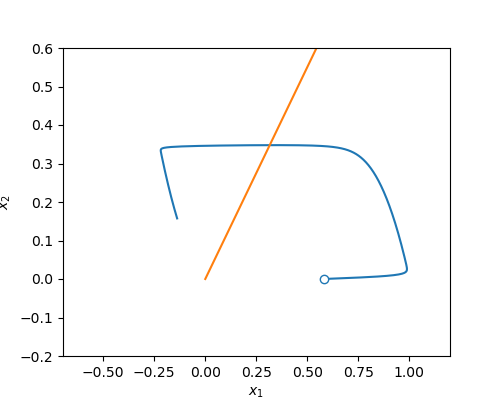

In [4]:
plt.close("all")
nagumo_fig = plt.figure(figsize=(5,4))

def nagumo_interactive(a = 3, b = 0.2, I = 0 , e = 0.01 , Tmax = 20, init_u=0.02, init_w =0):
    plt.figure(nagumo_fig)
    plt.clf()
    ts = np.linspace(0,Tmax,round(Tmax*10))
    #x0 = [1, b/a + init] #from brusselator-makes sense here?
    x0 = [0 + init_u ,0 + init_w]
    traj = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0, ts)
    lh = plt.plot(traj[:,0], traj[:,1])
    
    ##########
    #this is where the nullcline of u_dot should be
    ncu = np.linspace(0,11,11)
    plt.plot(ncu)
    ###########
    
    #plt.arrow(traj[0,0], traj[0,1], traj[1,0]-traj[0,0], traj[1,1]-traj[0,1], shape='full', color=lh[0].get_color(), lw=0, length_includes_head=True, head_width=.12)
    plt.plot(*x0, 'bo', markeredgecolor = lh[0].get_color(), markerfacecolor = 'w') #starting point x0
    #plt.plot(1, b/a, 'ko')   #bruss
    #plt.xlim(0.25,2)        #bruss
    #plt.ylim(b/a-2,2+b/a)   #bruss
    plt.xlim(-0.7,1.2)#(-60,60)#(-0.7,1.2)
    plt.ylim(-0.2,0.6)#(-60,60)#(-1,2)#(-0.2,0.6)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
interact(nagumo_interactive,
         
         a = FloatSlider(min=0, max=5, step=0.01, value=3, continuous_update=False, description='a', style=style, layout=slider_layout),
         b = FloatSlider(min=0, max=2, step=0.01, value=0.2, continuous_update=False, description='b', style=style, layout=slider_layout),
         e = FloatSlider(min=0, max=0.1, step=0.0001, value=0.01, continuous_update=False, description='e', style=style, layout=slider_layout),
         I = FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=False, description='I', style=style, layout=slider_layout),
         Tmax = FloatSlider(min=10, max=500, step=10, value=100, continuous_update=False, description='Tmax', style=style, layout=slider_layout),
         init_u = FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.58, continuous_update=False, description='u0', style=style, layout=slider_layout),
         init_w = FloatSlider(min=-1.0, max=1.0, step=0.02, value=0, continuous_update=False, description='w0', style=style, layout=slider_layout),
        
         #bruss
         #a = FloatSlider(min=0, max=5, step=0.01, value=1, continuous_update=False, description='a', style=style, layout=slider_layout),
         #b = FloatSlider(min=0, max=2, step=0.01, value=1.5, continuous_update=False, description='b', style=style, layout=slider_layout),        
         #Tmax = FloatSlider(min=10, max=500, step=10, value=20, continuous_update=False, description='Tmax', style=style, layout=slider_layout),
         #init = FloatSlider(min=0.0, max=2.0, step=0.02, value=0.5, continuous_update=False, description='init', style=style, layout=slider_layout),
        
        );

